<a href="https://colab.research.google.com/github/LuisaBeccar/Clases-de-CoderHouse-Data-Science/blob/main/LuisaBeccarVarela_TP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TP FINAL - CIENCIA DE DATOS 61140 - CODERCHOUSE 2024**

LUISA BECCAR VARELA

**BASE DE DATOS**: https://www.kaggle.com/datasets/reihanenamdari/breast-cancer

**OBJETIVO**: predecir si una mujer estará viva a 60 meses del diagnosico de cancer de mama, segun las caracteristicas del mismo.

**GoogleDocs** con info de keaggle: https://docs.google.com/document/d/1ofLvEWfsKA5JoBvPefpYpRLBcislwlSpsg1Wm2PbLuY/edit


Recomendaciones a seguir Facu 6 mayo:
Abrir un notebook en colab
Empezar a investigar como descargar tu dataset y como leer un archivo csv desde el notebook (en kaggle donde dice “code” hay ejemplos de gente que ya trabajo con ese mismo dataset.. ahi podes ver el codigo que ejecutaron)
Intentes empezar a programar y probar líneas de codigo con tu dataset, viendo como lo hicieron otras personas para empezar a familiarizarte con el codigo, pero solo a modo de visualización porque lo haremos en clase a eso mismo.
La idea es que manejes bien los notebook de colab, tenerlos en drive compartidos para que yo pueda ir corrigiendo sus avances de trabajo a través del drive.

16 de mayo <br>
libreria “matplotlib”. Para entender como funciona piensen en una ventana vacia (hoja en blanco) a la cual le van agregando cosas, por ejemplos los ejes, las divisiones, los numeros, etiquetas y el grafico en cuestión (linea, puntos, barras, círculos, figuras, etc), y ademas le pueden cambiar la propiedad que se les ocurra como lo hacen en excel o cualquier otro software (grosor de linea, color, grillas, puntos, tendencias etc). <br>
La semana q viene vamos a ver otra libreria para graficos llamada seaborn. <br>
Vayan intentando hacer graficos para cada una de las variables de su dataset (cualquiera de los 3 que hayan seleccionado, el que no los presento aun no se preocupe pero vayan avisandome si necesitan ayuda con la eleccion). Aprovechen a hacer pruebas directamente con sus dataset, ademas de los archivos de clases..

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


In [2]:
url = 'https://raw.githubusercontent.com/LuisaBeccar/Clases-de-CoderHouse-Data-Science/main/Breast_Cancer.csv'
df = pd.read_csv(url)

In [ ]:
# probando codigos para investigar la base de datos

print(df.columns, "\n",

      df.dtypes, "\n",

      df.index, "\n",

      df.info(), "\n",

      df.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [3]:
# agregar columna "Sobrevida si sobrevivio mas de 60 meses (5 años)

#print(df["Survival Months"].dtype) #int

Sobrevida = []
for i in df["Survival Months"]: #para cada elemento de "survival months", evalua si es mayor a 60 meses (5 años) (TRUE) y el resultado booleano (TRUE O FALSE) agregalo a la lista "Sobrevida"
    Sobrevida.append(i >= 60)

Sobrevida = pd.Series(Sobrevida)

df["Sobrevida"] = Sobrevida
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,Sobrevida
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive,True
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive,True
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive,True
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive,True
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive,False


In [10]:
ax.boxplot?

Text(0.5, 1.0, 'Meses de supervivencia')

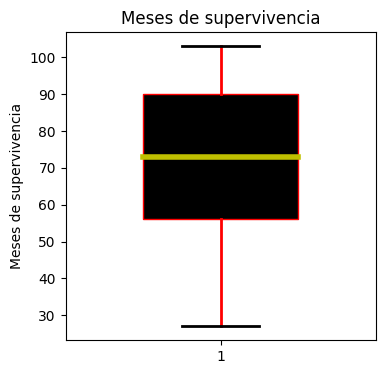

In [59]:
# Survival Months descripcion y grafiquito boxplot

df["Survival Months"].describe()

fig, ax = plt.subplots(figsize=(4,4))
ax.boxplot(df["Survival Months"], sym='', widths=0.5, patch_artist=True,
           boxprops={"color":"r", "facecolor":"k"},
           medianprops = {"color":"y", "linewidth":4}, whis=(5,95),
           whiskerprops={"color":"r", "linewidth":2},
           capprops = dict(color = "black", linewidth = 2)) # otra forma de poner el dictionary con los datos
"""
notch=True (None normal, True le hace una cinturita a la media, False muestra el IC)
sym=None (outliers, "" hides)
           vert=None, =default=True box vertical, False : hace el box horizontal
           whis=None, posicion de bigotes, default 1.5 corresponds to Tukey's original definition of boxplots. If a pair of floats, they indicate the percentiles at which to
    draw the whiskers (e.g., (5, 95)).  In particular, setting this to (0, 100) results in whiskers covering the whole range of the data.
 Beyond the whiskers, data are considered outliers and are plotted as individual points
           positions=None,
           widths=None,
           patch_artist=None,
           bootstrap=None,
           usermedians=None,
           conf_intervals=None,
           meanline=None,
           showmeans=None,
           showcaps=None,
           showbox=None,
           showfliers=None,
           boxprops=None,
           labels=None,
           flierprops=None,
           medianprops=None,
           meanprops=None,
           capprops=None,
           whiskerprops=None,
           manage_ticks=True,
           autorange=False,
           zorder=None,
           capwidths=None, *,
           data=None)
  """
ax.set_ylabel("Meses de supervivencia")
ax.set_title("Meses de supervivencia")

#df.boxplot("Survival Months", ylabel = "Survival Months")


In [ ]:
#ver las filas de el que menos sobrevivio (1 mes) y los que mas sobrevivieron (107 meses)

SVmin = df["Survival Months"].min()
#SVmin #1 mes
minSV = df[df["Survival Months"] == SVmin]
minSV

SVmax = df["Survival Months"].max()
#SVmax # 107 meses
maxSV = df[df["Survival Months"] == SVmax]
maxSV


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
18,48,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,25,Positive,Positive,16,1,107,Alive
145,61,White,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,15,1,107,Alive
222,46,White,Single,T1,N1,IIA,Moderately differentiated,2,Regional,12,Positive,Positive,18,2,107,Alive
242,69,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,28,Positive,Positive,9,2,107,Alive
287,56,Other,Married,T2,N3,IIIC,Poorly differentiated,3,Regional,38,Positive,Positive,12,11,107,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3788,48,White,Single,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,18,3,107,Alive
3837,65,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,11,Positive,Positive,1,1,107,Alive
3892,59,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,50,Positive,Positive,8,2,107,Alive
3919,49,White,Married,T2,N3,IIIC,Poorly differentiated,3,Distant,25,Positive,Positive,24,2,107,Alive


In [4]:
# Sobrevida descripcion y

df["Sobrevida"].describe()

SobrevidaCategorias = df["Sobrevida"].groupby(df["Sobrevida"]).count()
SobrevidaCategorias

DescNumericasAgrup = df.groupby(df["Sobrevida"]).describe()
DescNumericasAgrup.T

DescCategoricAgrup = df.groupby(df["Sobrevida"]).describe(include=object)
DescCategoricAgrup.T

DescribeTodo = [DescCategoricAgrup, DescNumericasAgrup]
DescribeTodo

[           Race                     Marital Status                        \
           count unique    top  freq          count unique      top  freq   
 Sobrevida                                                                  
 False      1203      3  White  1012           1203      5  Married   778   
 True       2821      3  White  2401           2821      5  Married  1865   
 
           T Stage          ... Estrogen Status       Progesterone Status  \
              count unique  ...             top  freq               count   
 Sobrevida                  ...                                             
 False         1203      4  ...        Positive  1083                1203   
 True          2821      4  ...        Positive  2672                2821   
 
                                  Status                      
           unique       top  freq  count unique    top  freq  
 Sobrevida                                                    
 False          2  Positive   942   1

In [5]:
# SOBREVIVIENTES df_SV (survival months >=60 meses) vs NO SOBREVIVIENTES df_NOsv (survival months < 60 meses)  descripciones
df_SV = df[df["Survival Months"] >= 60]
#df_SV
print("SOBREVIVIENTES", df_SV.describe(include=object).T, "\n", "\n", df_SV.describe().T)

print( "\n", "------------------------------", "\n" )
df_NOsv = df[df["Survival Months"] <60]
#df_NOsv
print("NO SOBREVIVIENTES", df_NOsv.describe(include=object).T, "\n", "\n", df_NOsv.describe().T)

SOBREVIVIENTES                     count unique                        top  freq
Race                 2821      3                      White  2401
Marital Status       2821      5                    Married  1865
T Stage              2821      4                         T2  1229
N Stage              2821      3                         N1  1989
6th Stage            2821      5                        IIA   980
differentiate        2821      4  Moderately differentiated  1686
Grade                2821      4                          2  1686
A Stage              2821      2                   Regional  2773
Estrogen Status      2821      2                   Positive  2672
Progesterone Status  2821      2                   Positive  2384
Status               2821      2                      Alive  2654 
 
                          count       mean        std   min   25%   50%   75%  \
Age                     2821.0  53.921305   8.867994  30.0  47.0  54.0  61.0   
Tumor Size              2821.

# PROBANDO GRAFICOS

Text(0, 0.5, 'Total')

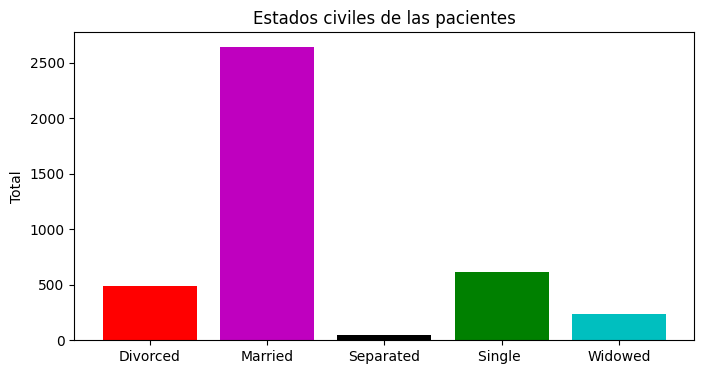

In [ ]:
# BARRAS
fig, ax = plt.subplots(figsize=(8,4))
estados_civiles = df.groupby('Marital Status')[['Age']].count()
colores = {"r","g","c","m","k"}
ax.bar(estados_civiles.index, estados_civiles["Age"], color=colores)
ax.set_title('Estados civiles de las pacientes')
ax.set_ylabel('Total')


Text(0, 0.5, 'Cantidad')

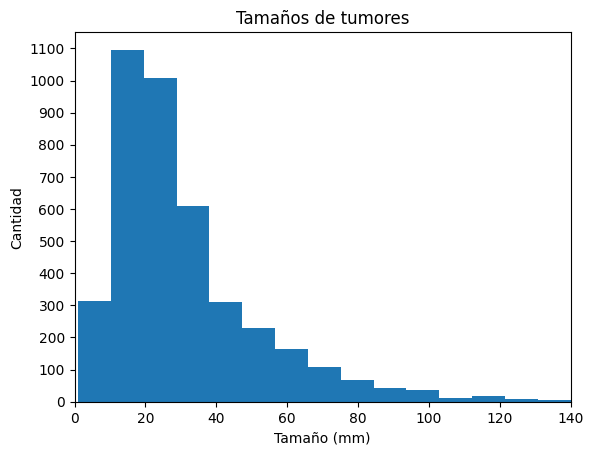

In [ ]:
# Histograma

size = np.array(df['Tumor Size'])
fig, ax = plt.subplots()
ax.hist(size, bins=15) # default daba 10 bins
ax.set_title('Tamaños de tumores')
ax.set_xlim([0,140])
ax.set_yticks(range(0, 141, 10))
ax.set_xlabel('Tamaño (mm)')
ax.set_yticks(range(0, 1200, 100))
ax.set_ylabel('Cantidad')


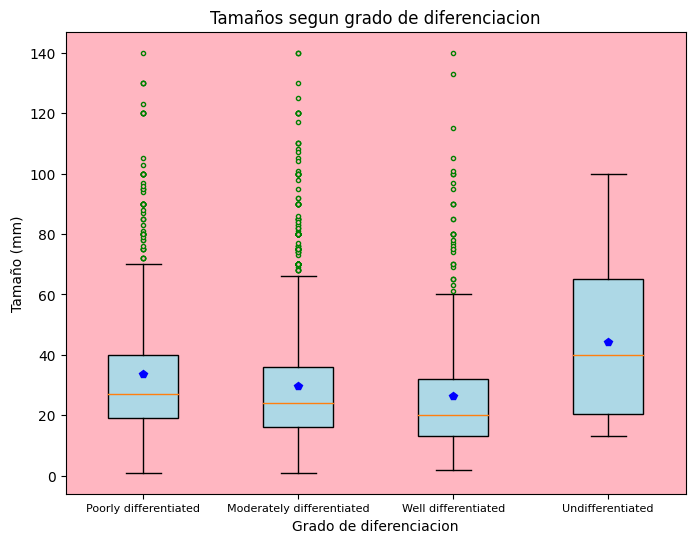

In [96]:
# BOXPLOT de tamaño segun grado de diferenciacion
grouped_data = [df[df['differentiate'] == categoria]['Tumor Size']
                for categoria in df['differentiate'].unique()]
colores = ['g','r','b','k']

fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot(grouped_data, labels=df['differentiate'].unique(),
           patch_artist=True,
           showmeans=True, #triangulito verde la media muestral de cada categoria
           meanprops = dict(marker='p', markeredgecolor='blue',markerfacecolor='blue'), #D es diamante, otros https://matplotlib.org/3.1.0/api/markers_api.html , p pentagonito,
           flierprops=dict(marker='o',
                           markerfacecolor='lightpink', #igual que el fondo de lienzo
                           markersize=3,
                           linestyle='',
                           markeredgecolor='g'),
           boxprops = dict(facecolor="lightblue"))
ax.set_xticklabels(df['differentiate'].unique(), fontsize=8, )
ax.set_title('Tamaños segun grado de diferenciacion')
ax.set_xlabel('Grado de diferenciacion')
ax.set_ylabel('Tamaño (mm)')
ax.set_facecolor('lightpink') #fondo
